In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, special

In [3]:
def LCG(a, c, M, x0, n):
    seq = [np.mod(a*x0+c,M)]
    for i in range(n-1):
        seq.append(np.mod(a*seq[i]+c, M))
    return seq

In [4]:
a = 5
c = 1
M = 16
run = np.array(LCG(a,c,M,3,10000))/M

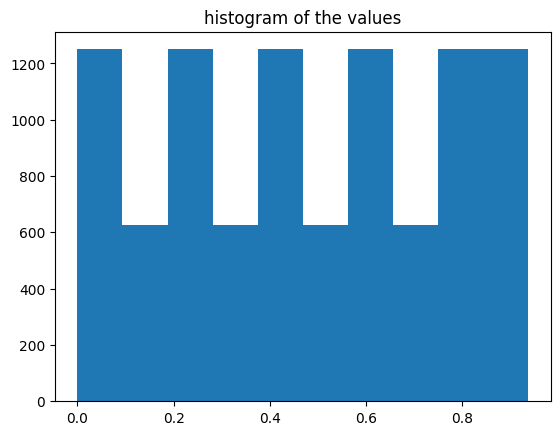

In [5]:
plt.hist(run, bins = 10)
plt.title('histogram of the values')
plt.show()

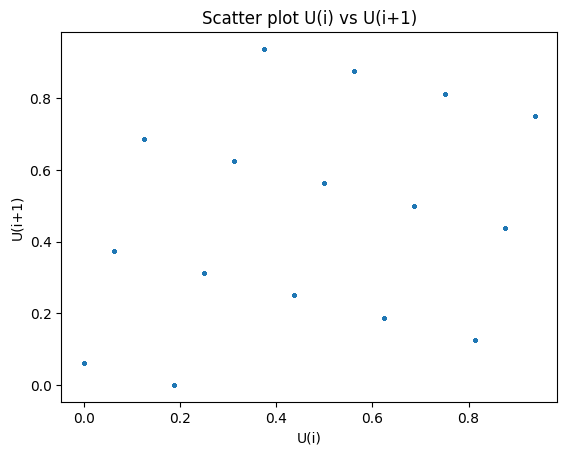

In [6]:
plt.scatter(run[:-1], run[1:], s = 3)
plt.title('Scatter plot U(i) vs U(i+1)')
plt.xlabel('U(i)')
plt.ylabel('U(i+1)')
plt.show()

Chi squared test

In [7]:
def chisq(run, k):
    observed = np.histogram(run, k)[0]
    expected = np.ones(k, dtype=int)*(len(run)/k)
    p = 1-stats.chi2.cdf(np.sum((observed - expected)**2/expected), df = k - 1)
    return np.sum((observed - expected)**2/expected), p, observed

k = 10
T, p, o = chisq(run, k)
T, p

(937.5, 0.0)

KS test

In [8]:
def KS(run):
    n = len(run)
    sorted_run = sorted(run)
    hypothized = np.linspace(0, 1, n)
    D = max(abs(np.array(sorted_run) - np.array(hypothized)))
    T =  (np.sqrt(n) + 0.12 + (0.11/np.sqrt(n))) * D
    return T, D

def KS2(run):
    sorted_run = sorted(run)
    run_unique = np.unique(sorted_run)
    Fn_unique = np.zeros(len(run_unique))
    for i in range(len(run_unique)):
        Fn_unique[i] = np.sum(sorted_run == run_unique[i])
    Fn_unique = np.cumsum(Fn_unique)/len(run)
    Fn = np.zeros(len(run))
    for i in range(len(run_unique)):
        mask = sorted_run == run_unique
        Fn[mask] = Fn_unique[i]
    D = np.max(np.abs(Fn - sorted_run))
    T =  (np.sqrt(n) + 0.12 + (0.11/np.sqrt(n))) * D
    return T, D, run_unique

n = len(run)
T, Dn = KS(run)
p = 1 - stats.kstwobign.cdf(T)
stats.kstest(np.array(run), cdf = 'uniform'), KS(run), p


(KstestResult(statistic=0.0625, pvalue=2.112988817772465e-34),
 (6.25756875, 0.0625),
 0.0)

Run test 1 (Above/below)

In [17]:
def runTest1(run):
    med = np.median(run)
    n1 = np.sum(run > med)
    n2 = np.sum(run <= med)

    runs = 0
    above = run[0] > med
    for x in run[1:]:
        if((above == True) and (x<=med)):
            runs+=1
            above = False
        if((above == False) and (x>med)):
            runs+=1
            above=True
    runs +=1
    mean = 2*n1*n2/(n1+n2)
    var = 2*n1*n2/(n1+n2)**2/(n1+n2-1)*(2*n1*n2-n1-n2)
    return 2*(1 - stats.norm.cdf(np.abs(runs-mean), 0, np.sqrt(var))), runs

pvalue, runs = runTest1(run)
pvalue, runs


(0.0, 3751)

Run test 2 (Up/Down)

In [10]:
def runTest2(run):
    runs = np.sum(np.ediff1d(run)<0)+1
    A = 0

